===========output 1 color map================


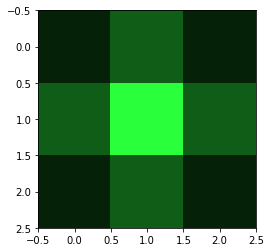

===========output 3 color map================


<Figure size 432x288 with 0 Axes>

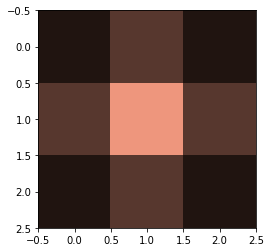

===========output 5 color map================


<Figure size 432x288 with 0 Axes>

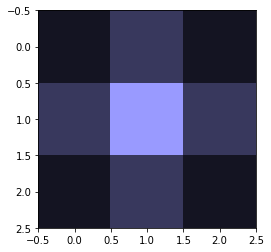

===========output 7 color map================


<Figure size 432x288 with 0 Axes>

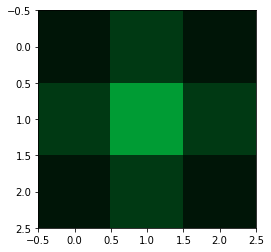

===========output 9 color map================


<Figure size 432x288 with 0 Axes>

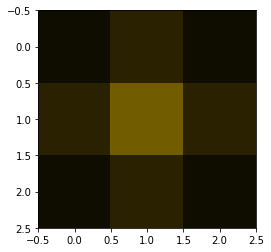

<Figure size 432x288 with 0 Axes>

In [2]:
"""自分独自で考えるカラーマップの参考の考え方 案1"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

DESIGN_PARAMS_NUM=6
DESIGN_NUM=10

#正規化した入力データ
x=[[np.random.rand() for _ in range(DESIGN_PARAMS_NUM)] for _ in range(DESIGN_NUM)]

#出力マップの大きさ
output_size=3

#最適化指標のインデクス
obj_index=[1,3,5]

#正規化
def scaler(obj_index,x):
    obj=[]
    for i in range(DESIGN_NUM):
        obj.append(x[i][obj_index])
        
    obj_sc=[(obj[i]-min(obj))/(max(obj)-min(obj)) for i in range(DESIGN_NUM)]
    return obj_sc

idx=0
color_point=[]
obj_sc=[scaler(obj_index[idx],x) for idx in range(len(obj_index))]


color_point=[]
jdx=0
while jdx<DESIGN_NUM:
    color_point_ind=[]
    for j in range(DESIGN_NUM):
        for i in range(3):
            if j==jdx:
                color_point_ind.append(obj_sc[i][j])
                
    color_point.append(color_point_ind)
    jdx+=1
#print('each individual color num:',color_point)
     
    
    

#一次元データから二次元データへ
def index_change(index):
    idx=index//output_size
    jdx=index%output_size
    
    return idx,jdx

#マップ上での距離を表す
def dis(index_1,index_2):
    idx_1,jdx_1=index_change(index_1)
    idx_2,jdx_2=index_change(index_2)
    
    return (idx_1-idx_2)**2+(jdx_1-jdx_2)**2


center_index=int(output_size**2/2)


def color_int_in_map_center(key_index,color_point,index_x):
    #index_xは何番目の個体かを示す
    dist=[]
    for idx in range(output_size**2):
        dist.append(dis(idx,key_index))
    
    color_int=[]
    for i in range(len(dist)):
        color_int.append([np.exp(-dist[i])*color_point[index_x][k] for k in range(len(obj_index))])
        
    return color_int


def color_int_in_map_edge(key_index,color_point,index_x):
    dist=[]
    color_int=[]
    return color_int

color_map=[]
for index_x in range(DESIGN_NUM):
    color_map.append(color_int_in_map_center(center_index,color_point,index_x))

    
path='data_set_x'
#どの設計番号か
for design_number in range(DESIGN_NUM):
    color_map_output=[]
    for i in range(0,output_size**2,output_size):
        color_map_output.append(color_map[design_number][i:i+output_size])
        
    
        
    if design_number%2==0:

        print('===========output %d color map================'%(design_number+1))
        plt.figure()
        plt.imshow(color_map_output)
        plt.show()
     
    #画像の保存
    if not os.path.exists(path):
        os.mkdir(path)
    
    plt.savefig('%s/color_map_%d.png'%(path,design_number+1))
        




=========1 number design space=======


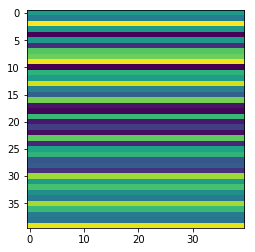

In [47]:
#設計データから正規化データを作成してさらに深層学習のデータセットを作成
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

DESIGN_PARAMS_NUM=40
DESIGN_NUM=10000
path='dataset_heatmap_x'

#深層学習のためのデータセット
dataset_heatmap_x=[]
dataset_heatmap_y=[]

#設計目標
obj_goal=[0.5,0.3]
obj_index=[4,6]

#入力データ
x=[[np.random.rand() for _ in range(DESIGN_PARAMS_NUM)] for _ in range(DESIGN_NUM)]

#ラベル付け
def label(obj_goal,obj_index,x_color_map):
    #二つ目的関数の時
    index_1=obj_index[0]
    index_2=obj_index[1]
    
    if x_color_map[index_1][0]<obj_goal[0] and x_color_map[index_2][0]<obj_goal[1]:
        label_ind=0
    elif x_color_map[index_1][0]<obj_goal[0] and x_color_map[index_2][0]>=obj_goal[1]:
        label_ind=1
    elif x_color_map[index_1][0]>=obj_goal[0] and x_color_map[index_2][0]<obj_goal[1]:
        label_ind=2
    elif x_color_map[index_1][0]>=obj_goal[0] and x_color_map[index_2][0]>=obj_goal[1]:
        label_ind=3
        
    return label_ind
        
        
        
        
        

for index_x in range(DESIGN_NUM):
    x_color_1d=[]
    x_color=x[index_x]
    for j in range(DESIGN_PARAMS_NUM):
        for i in range(0,DESIGN_PARAMS_NUM**2,DESIGN_PARAMS_NUM):
            x_color_1d.append(x_color[(i+j)%DESIGN_PARAMS_NUM])


    x_color_map=[]
    for i in range(0,DESIGN_PARAMS_NUM**2,DESIGN_PARAMS_NUM):
        x_color_map.append(x_color_1d[i:i+DESIGN_PARAMS_NUM])
        
        
    dataset_heatmap_x.append(x_color_map)
    dataset_heatmap_y.append(label(obj_goal,obj_index,x_color_map))
    
    
    #画像の保存
    #if not os.path.exists(path):
        #os.mkdir(path)
    #plt.savefig('{}/heatmap_{}.png'.format(path,index_x+1))
    
    if index_x%10000==0:
        print('=========%d number design space======='%(index_x+1))
        plt.imshow(x_color_map)
        plt.show()

#print(dataset_heatmap_x)
#print(dataset_heatmap_y)

(10000, 40, 40)
(10000,)
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 43s 5ms/step - loss: 1.0884 - acc: 0.5176 - val_loss: 0.6233 - val_acc: 0.7525
Epoch 2/10
8000/8000 [==============================] - 42s 5ms/step - loss: 0.6774 - acc: 0.7241 - val_loss: 0.4808 - val_acc: 0.8115
Epoch 3/10
8000/8000 [==============================] - 47s 6ms/step - loss: 0.5654 - acc: 0.7752 - val_loss: 0.3902 - val_acc: 0.8495
Epoch 4/10
8000/8000 [==============================] - 50s 6ms/step - loss: 0.5226 - acc: 0.7962 - val_loss: 0.3461 - val_acc: 0.8660
Epoch 5/10
8000/8000 [==============================] - 37s 5ms/step - loss: 0.4621 - acc: 0.8220 - val_loss: 0.3645 - val_acc: 0.8555
Epoch 6/10
8000/8000 [==============================] - 42s 5ms/step - loss: 0.4368 - acc: 0.8244 - val_loss: 0.3703 - val_acc: 0.8495
Epoch 7/10
8000/8000 [==============================] - 42s 5ms/step - loss: 0.4217 - acc: 0.8320 - val_loss: 0.3293 

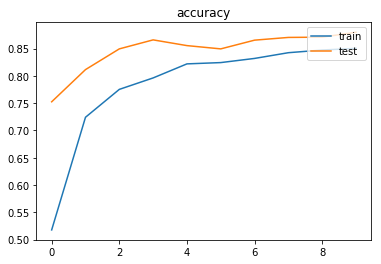

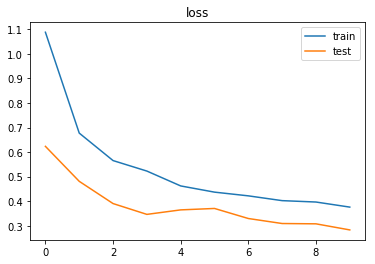

In [48]:
#深層学習モデル(keras) 自動でデータセットを分析できる
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import cv2
import os

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import RMSprop
from keras.utils import to_categorical

#入力データ(深層学習)
dataset_x=np.array(dataset_heatmap_x)
dataset_y=np.array(dataset_heatmap_y)
train_rate=0.8
epochs=10

#shape
input_shape=(DESIGN_PARAMS_NUM,DESIGN_PARAMS_NUM,1)
output_size=4

print(dataset_x.shape)
print(dataset_y.shape)

def train_test_split(x,y,train_rate):
    data_num=x.shape[0]
    train_num=int(data_num*train_rate)
    
    x_train,x_test=x[:train_num],x[train_num:]
    y_train,y_test=y[:train_num],y[train_num:]
    
    return (x_train,y_train),(x_test,y_test)


(x_train,y_train),(x_test,y_test)=train_test_split(dataset_x,dataset_y,train_rate)
x_train=x_train.reshape(-1,DESIGN_PARAMS_NUM,DESIGN_PARAMS_NUM,1).astype('float32')
x_test=x_test.reshape(-1,DESIGN_PARAMS_NUM,DESIGN_PARAMS_NUM,1).astype('float32')

y_train=to_categorical(y_train,output_size)
y_test=to_categorical(y_test,output_size)

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_size,activation='softmax'))


#build
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['acc'])

#学習の開始
hist=model.fit(x_train,y_train,batch_size=32,epochs=epochs,verbose=1,validation_data=(x_test,y_test))


#モデルの評価
score=model.evaluate(x_test,y_test,verbose=1)
print('loss:',score[0],'accuracy:',score[1])


#学習の描画
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()


#学習したモデルの保存とload



Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 194s 3ms/step - loss: 0.2021 - acc: 0.9364 - val_loss: 0.0542 - val_acc: 0.9823
Epoch 2/15
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0601 - acc: 0.9815 - val_loss: 0.0338 - val_acc: 0.9892
Epoch 3/15
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0440 - acc: 0.9867 - val_loss: 0.0293 - val_acc: 0.9893
Epoch 4/15
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0347 - acc: 0.9895 - val_loss: 0.0299 - val_acc: 0.9897
Epoch 5/15
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0302 - acc: 0.9910 - val_loss: 0.0277 - val_acc: 0.9905
Epoch 6/15
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0243 - val_acc: 0.9925
Epoch 7/15
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0207 - acc: 0.9939 - val_loss: 0.0233 - 

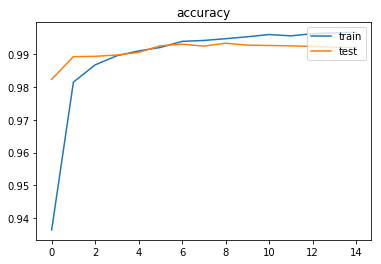

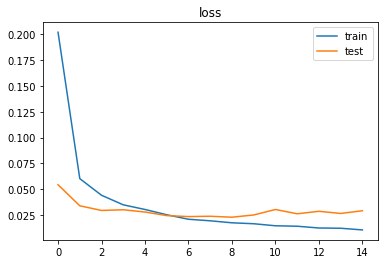

In [37]:
#CNN
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.optimizers import RMSprop

"""層を構築するためのクラスはkeras.layers
   層をビルドするためのクラスはkeras.models
   線形活性化(Activation)、ドロップアウト(Dropout)、平滑化(Flatten)、全結合(Dense)"""




#datasets load
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#一枚当たりの大きさ
input_size=(28,28,1)
#どれくらいのクラスに分類するか
out_size=10

#データの正規化
X_train=X_train.reshape(-1,28,28,1)
X_train=X_train.astype('float32')/255

X_test=X_test.reshape(-1,28,28,1)
X_test=X_test.astype('float32')/255

#onehot
y_train=keras.utils.to_categorical(y_train.astype('float32'),out_size)
y_test=keras.utils.to_categorical(y_test.astype('float32'),out_size)


#一枚当たりの大きさ
input_size=(28,28,1)
#どれくらいのクラスに分類するか
out_size=10



#CNN
#モデルのビルドのため
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_size))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#学習の実行
hist=model.fit(X_train,y_train,batch_size=128,epochs=15,verbose=1,validation_data=(X_test,y_test))

#モデルの評価
score=model.evaluate(X_test,y_test,verbose=1)
print('loss:',score[0],'accuracy:',score[1])

#学習の様子の可視化
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()



